In [1]:
# Group all `import`s here at a later date.

# Data Cleaning & Checking

## Importing, checking and cleaning the (non-image) data

First, import the csv file for non-image features and take a look at it.

In [2]:
import pandas as pd

In [3]:
raw_data_path = "../raw_data/Data_Entry_2017.csv"
data = pd.read_csv(raw_data_path)

In [4]:
data.shape

(112120, 12)

In [5]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


Drop the columns we don't need and set shorter column names.

In [6]:
data.drop(data.columns[-1], axis=1, inplace=True)
data.drop(columns=["Follow-up #"], inplace=True)
data.columns = ["img_idx", "labels", "id", "age", "gender", "view_pos", "img_w", "img_h", "img_pix_spc_x", "img_pix_spc_y"]

In [7]:
data.shape

(112120, 10)

In [8]:
data.head()

,img_idx,labels,id,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y
0,00000001_000.png,Cardiomegaly,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,3,81,F,PA,2582,2991,0.143,0.143


Take a look at data statistics, cardinality, types, etc.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   img_idx        112120 non-null  object 
 1   labels         112120 non-null  object 
 2   id             112120 non-null  int64  
 3   age            112120 non-null  int64  
 4   gender         112120 non-null  object 
 5   view_pos       112120 non-null  object 
 6   img_w          112120 non-null  int64  
 7   img_h          112120 non-null  int64  
 8   img_pix_spc_x  112120 non-null  float64
 9   img_pix_spc_y  112120 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 8.6+ MB


In [22]:
data.isnull().values.any()

False

It appears that we do not have any `null`s, which is good.  
**_To do:_** Consider downcasting data types to save memory.  
For example:  
```python
data["age"] = pd.to_numeric(data["age"], downcast=’uint8’) # 0-255
```
Binary columns can be `bool` and image specs can be smaller variants of `int`.

In [10]:
data.nunique()

img_idx          112120
labels              836
id                30805
age                 107
gender                2
view_pos              2
img_w               904
img_h              1137
img_pix_spc_x        23
img_pix_spc_y        23
dtype: int64

In [11]:
data.describe()

,id,age,img_w,img_h,img_pix_spc_x,img_pix_spc_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


Maximum age of `414` does not make sense. There appears to be an issue with the `age` column.

In [12]:
# import matplotlib.pyplot as plt
import seaborn as sns

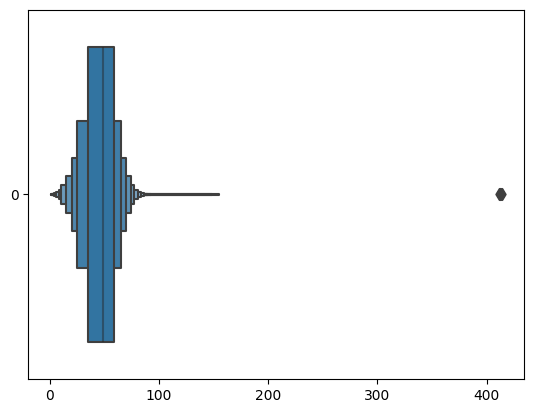

In [13]:
sns.boxenplot(data.age, orient="horizontal");

In [14]:
data = data[data.age < 125] # The oldest person to ever live was ~122 years old when they passed.

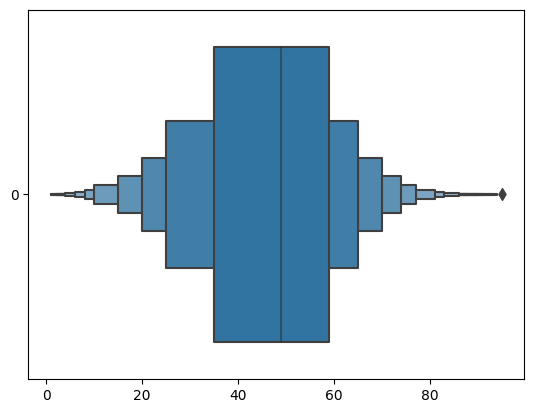

In [15]:
sns.boxenplot(data.age, orient="horizontal");

In [16]:
data.shape

(112104, 10)

Check for duplicates.

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(112104, 10)

In [19]:
data.tail()

,img_idx,labels,id,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y
112115,00030801_001.png,Mass|Pneumonia,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,30804,30,F,PA,2048,2500,0.168,0.168
112119,00030805_000.png,No Finding,30805,27,M,PA,2048,2500,0.171,0.171


Visualize the data.

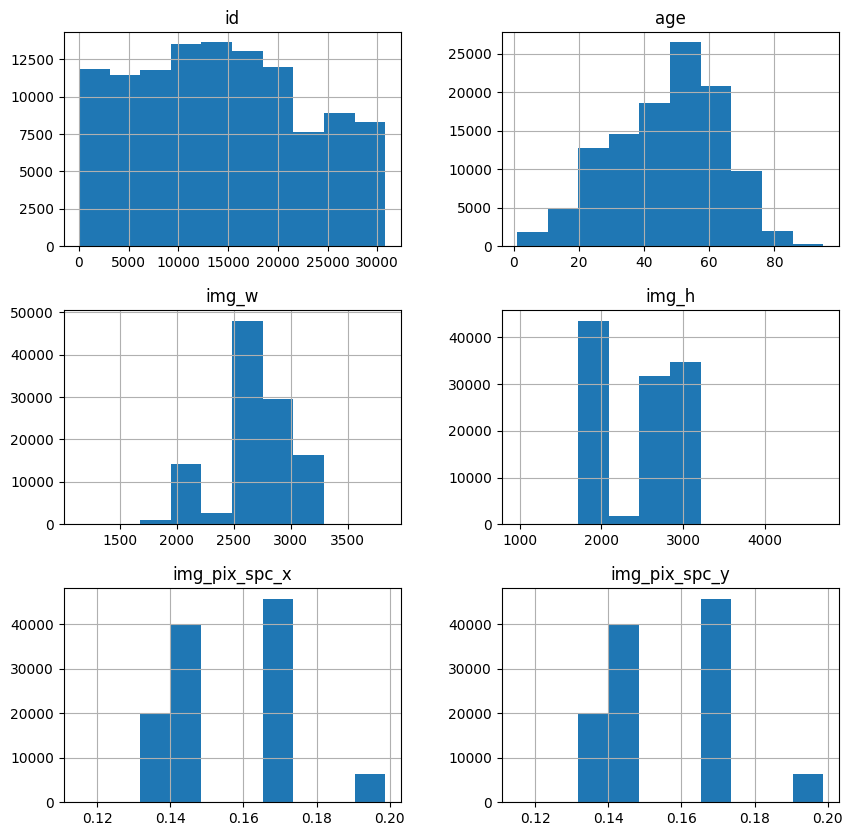

In [21]:
data.hist(figsize=(10,10));

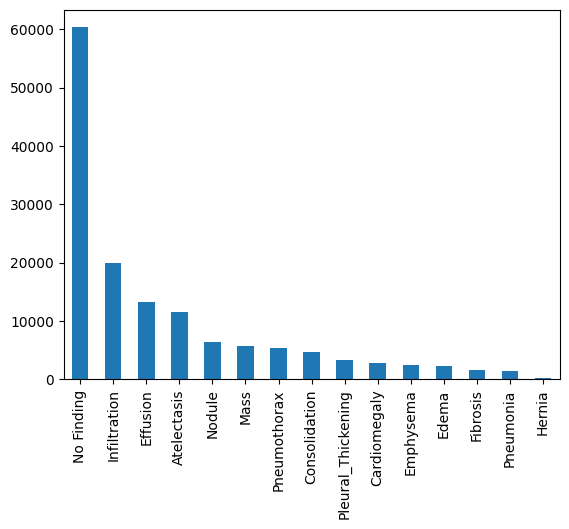

In [24]:
# Split labels based on a delimiter 
data["labels"].str.split("|").explode("labels").value_counts().plot(kind="bar");

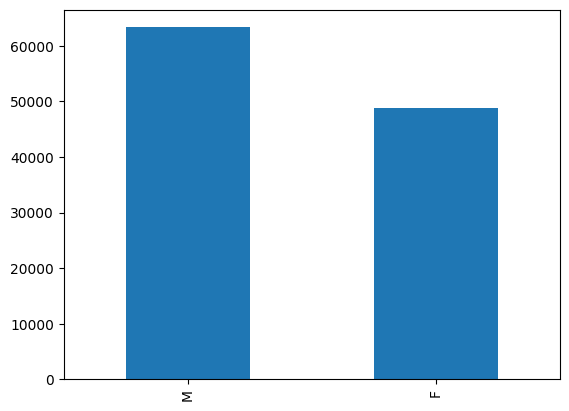

In [26]:
data["gender"].value_counts().plot(kind="bar");

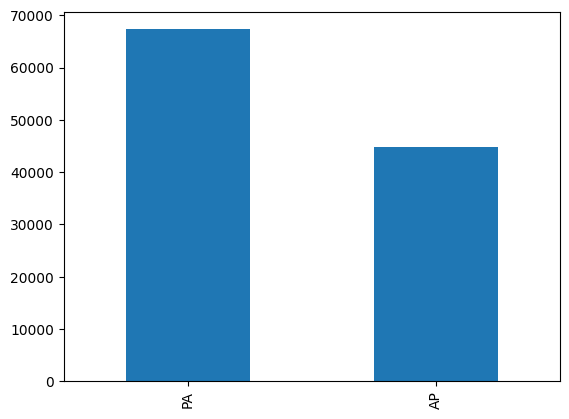

In [28]:
data["view_pos"].value_counts().plot(kind="bar");

Save the cleaned data to disk.

In [29]:
clean_data_path = "../clean_data/cleaned_data.csv"
data.to_csv(clean_data_path)